In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
Data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', keep_default_na=True)
Test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',keep_default_na=True)
data=pd.concat([Data,Test])

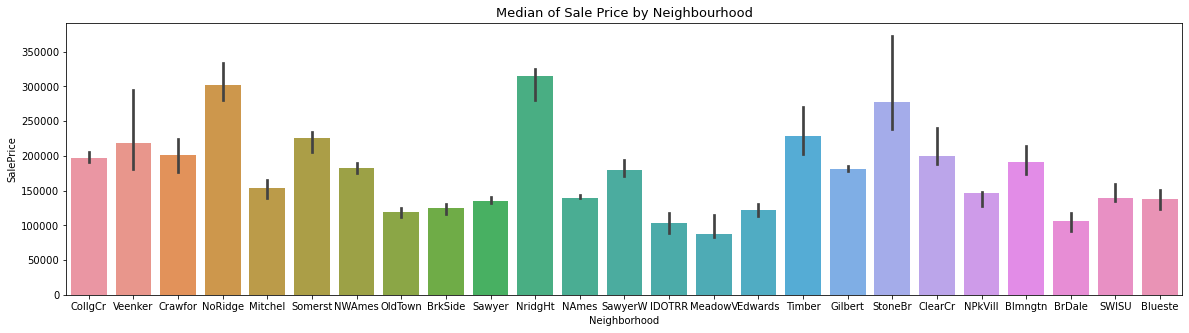

In [3]:


plt.figure(figsize = (20,5))
sns.barplot(x='Neighborhood', y="SalePrice", data = data, estimator = np.median)
plt.title('Median of Sale Price by Neighbourhood', fontsize = 13)
plt.show()



(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <BarContainer object of 50 artists>)

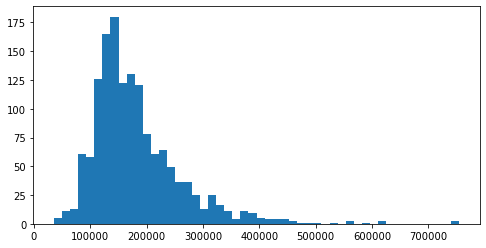

In [4]:
plt.figure(figsize=(8,4))
plt.hist(data.SalePrice,50)

In [5]:
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(value=0)
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(value=0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(value=0)
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(value=0)
data['GarageCars'] = data['GarageCars'].fillna(value=0)
data['GarageArea'] = data['GarageArea'].fillna(value=0)
data['LotFrontage'] = data['LotFrontage'].fillna(value=0)
data["LotFrontage"] = data["LotFrontage"].astype("int")
data['MasVnrArea'] = data['MasVnrArea'].fillna(value=0)
data["MasVnrArea"] = data["MasVnrArea"].astype("int")
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(value=0)
data["GarageYrBlt"] = data["GarageYrBlt"].astype("int")

data.MasVnrType=data.MasVnrType.fillna(value="none")

data.loc[~data.Alley.isna(),"Alley"]=1
data.loc[~data.Fence.isna(),"Fence"]=1


data.Fence=data.Fence.fillna(0)
data.Alley=data.Alley.fillna(0)
data[["Alley","Fence"]] = data[["Alley","Fence"]].astype("int")
data.MSZoning=data.MSZoning.fillna(value=data['MSZoning'].mode()[0])
data.BsmtQual=data.BsmtQual.fillna(value=data['BsmtQual'].mode()[0])
data.BsmtFinType1=data.BsmtFinType1.fillna(value=data['BsmtFinType1'].mode()[0])
data.BsmtFinType2=data.BsmtFinType2.fillna(value=data['BsmtFinType2'].mode()[0])
data.Functional=data.Functional.fillna(value=data['Functional'].mode()[0])
data.BsmtHalfBath=data.BsmtHalfBath.fillna(value=data['BsmtHalfBath'].mode()[0])
data.KitchenQual=data.KitchenQual.fillna(value=data['KitchenQual'].mode()[0])
data.Utilities=data.Utilities.fillna(value=data['Utilities'].mode()[0])
data.SaleType=data.SaleType.fillna(value=data['SaleType'].mode()[0])
data.BsmtUnfSF=data.BsmtUnfSF.fillna(value=data['BsmtUnfSF'].mode()[0])
data.Exterior1st=data.Exterior1st.fillna(value=data['Exterior1st'].mode()[0])
data.Exterior2nd=data.Exterior2nd.fillna(value=data['Exterior2nd'].mode()[0])

data.FireplaceQu=data.FireplaceQu.fillna(value="No")
data.GarageFinish=data.GarageFinish.fillna(value="No")
data.GarageType=data.GarageType.fillna(value="No")
data.GarageCond=data.GarageCond.fillna(value="No")
data.Electrical=data.Electrical.fillna(value=data.Electrical.mode()[0])
data.BsmtExposure=data.BsmtExposure.fillna(value="No")

data=data.drop(["PoolQC","GarageQual","BsmtCond","MiscFeature"],axis=1)

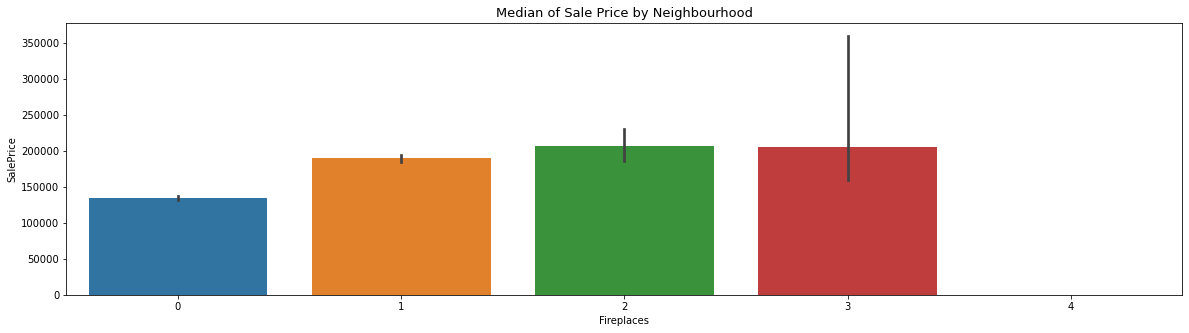

In [6]:
plt.figure(figsize = (20,5))
sns.barplot(x='Fireplaces', y="SalePrice", data = data, estimator = np.median)
plt.title('Median of Sale Price by Neighbourhood', fontsize = 13)
plt.show()


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

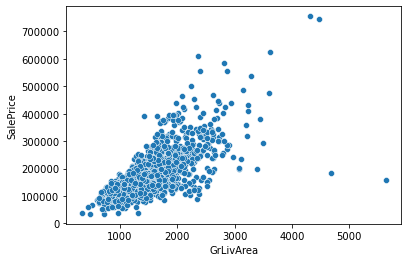

In [7]:
sns.scatterplot(x='GrLivArea', y="SalePrice",data=data)

In [8]:
data.corr().SalePrice


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.209624
LotArea          0.263843
Alley           -0.123611
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.261366
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
Fence           -0.172184
MiscVal         -0.021190
MoSold           0.046432
YrSold      

<AxesSubplot:>

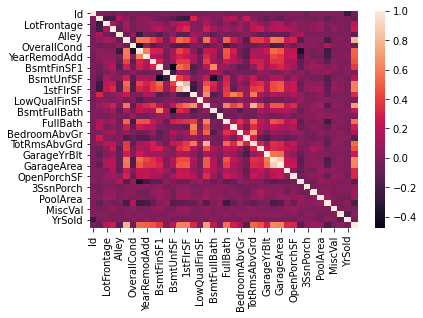

In [9]:
plt.plot(figsize=(20,20))
sns.heatmap(data.select_dtypes(include=np.number).corr())

In [10]:
data=pd.get_dummies(data)
test=data.iloc[1460:,:]
data=data.iloc[:1460,:]
test=test.drop("SalePrice",axis=1)
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( data.drop("SalePrice",axis=1), data.SalePrice, test_size=0.20)

In [11]:




from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
kf = KFold(n_splits=3, random_state=42, shuffle=True)

def cv_rmse(model):
    return -cross_val_score(model, xtrain, ytrain, scoring='neg_root_mean_squared_error', cv=kf)


scores = []
models=["forest","gradb","gradb1"]
regb = RandomForestRegressor(n_estimators=200)
score_regb = cv_rmse(regb)
scores.append(score_regb.mean())

gradb = GradientBoostingRegressor()
score_gradb = cv_rmse(gradb)
scores.append(score_gradb.mean())

gradb1 = GradientBoostingRegressor(criterion="mae")
score_gradb1 = cv_rmse(gradb1)
scores.append(score_gradb1.mean())

print(scores)

[32275.55598329582, 30406.1538307829, 30234.291100709437]


In [12]:
gradb1 = GradientBoostingRegressor(criterion="mae")
gradb1.fit(xtrain,ytrain)
pred=gradb1.predict(xtest)

In [13]:
# Performance metrics
errors = abs(pred - ytest)
print('Metrics for Random Forest Trained on Original Data')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 5), '%.')

Metrics for Random Forest Trained on Original Data
Accuracy: 90.86001 %.


In [14]:
pred = gradb1.predict(test)
pred


array([122591.25329688, 159252.18003139, 182224.29220958, ...,
       153803.43006289, 120748.14317588, 227691.9469439 ])

In [15]:
submission=pd.DataFrame(pred,columns=["SalePrice"])
submission["Id"]=Test.Id

submission.head()

SalePrice    Id
0  122591.253297  1461
1  159252.180031  1462
2  182224.292210  1463
3  183758.640091  1464
4  188608.269034  1465

In [16]:
submission.set_index("Id")
submission=submission.reindex(columns=["Id","SalePrice"])

submission.to_csv("Prediction_result.csv", index = False, header = True)